# KNN

* Henricky de Lima Monteiro 475075

github: [Atividade03-knn](https://github.com/HenrickyL/ML2023-HenrickyLima/tree/main/Atividade03-knn)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Neste exemplo baixei o dataset na plataforma do keggle e escolhi usar o de test por ser menor, como pode ver pelo "df.shape"

In [44]:
# carregando o conjunto de dados Fashion MNIST
# train = pd.read_csv("fashion-mnist_train.csv")
df = pd.read_csv("fashion-mnist_test.csv")
df.shape

(10000, 785)

inicialmente iria usar o exemplo da linha comentada, mas nesse exemplo não teria a divisão treino (70%), validação (10%)e teste (20%), depois de pesquisar achei a solução mais a baixo com a divisão 20% e 10%.

In [45]:
# Limpa e prepara os dados
y = df["label"]
X = df.drop(["label"], axis = 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Aqui estamos dividindo 80% dos dados para traino, 20% para teste e 10% dos 80% estão para avaliação

In [46]:
# Divide o dataset em treino (70%), validação (10%){test_size=0.1} e teste (20%) {test_size=0.2}
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=42)
print(len(X_train), len(X_val), len(X_test))

7200 800 2000


In [47]:
# Padronizando os dados de treino e teste
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Cria o classificador KNN
KVals = range(1,30,2)
accuracies = []
for k in KVals:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    #avaliacao
    score = knn.score(X_test_scaled, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)


k=1, accuracy=81.30%
k=3, accuracy=82.30%
k=5, accuracy=82.90%
k=7, accuracy=82.90%
k=9, accuracy=82.20%
k=11, accuracy=82.00%
k=13, accuracy=81.95%
k=15, accuracy=81.55%
k=17, accuracy=81.20%
k=19, accuracy=80.95%
k=21, accuracy=80.60%
k=23, accuracy=80.15%
k=25, accuracy=80.05%
k=27, accuracy=80.10%
k=29, accuracy=80.10%


Através do gráfico o valor k=5 parece ser o melhor

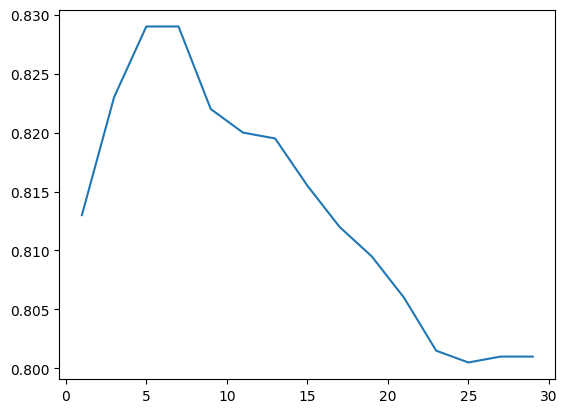

In [49]:
plt.plot(KVals, accuracies)

## Avaliação

Com base no test para saber o melhor k, obtemos o k=5, mas para fazer a comparação mais completa vamos mudar as metricas para cada k

### Euclidean

k=1, accuracy=81.30%
Acurácia no conjunto de validação: 0.8175
Acurácia no conjunto de teste: 0.813
k=3, accuracy=82.30%
Acurácia no conjunto de validação: 0.8275
Acurácia no conjunto de teste: 0.823
k=5, accuracy=82.90%
Acurácia no conjunto de validação: 0.8375
Acurácia no conjunto de teste: 0.829
k=7, accuracy=82.90%
Acurácia no conjunto de validação: 0.83625
Acurácia no conjunto de teste: 0.829
k=9, accuracy=82.20%
Acurácia no conjunto de validação: 0.83375
Acurácia no conjunto de teste: 0.822
k=11, accuracy=82.00%
Acurácia no conjunto de validação: 0.83125
Acurácia no conjunto de teste: 0.82
k=13, accuracy=81.95%
Acurácia no conjunto de validação: 0.82875
Acurácia no conjunto de teste: 0.8195
k=15, accuracy=81.55%
Acurácia no conjunto de validação: 0.82125
Acurácia no conjunto de teste: 0.8155
k=17, accuracy=81.20%
Acurácia no conjunto de validação: 0.815
Acurácia no conjunto de teste: 0.812
k=19, accuracy=80.95%
Acurácia no conjunto de validação: 0.81
Acurácia no conjunto de teste

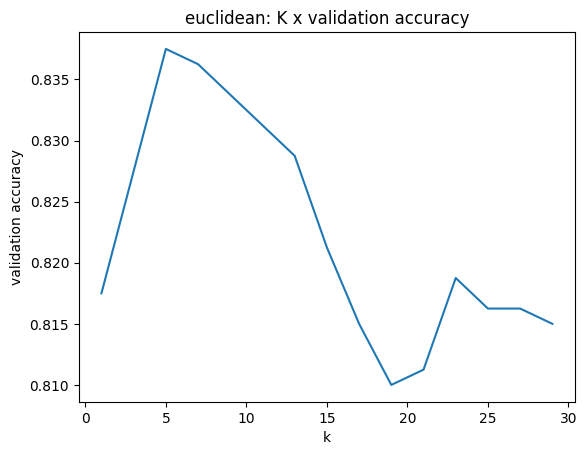

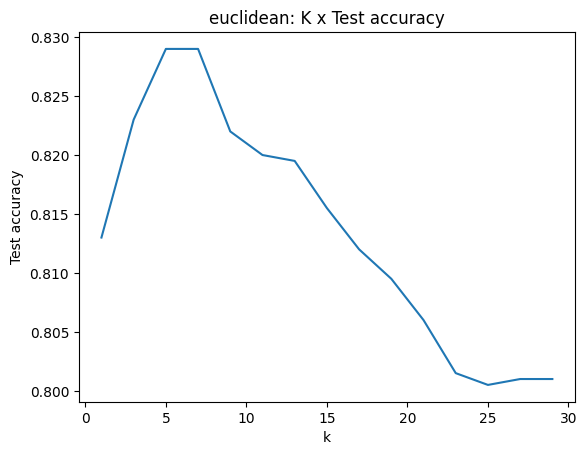

In [56]:
# Cria o classificador KNN
KVals = range(1,30,2)
accuracies = []
val_accuracies = []
test_accuracies = []
for k in KVals:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    #avaliacao
    score = knn.score(X_test_scaled, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    # Avaliar o modelo no conjunto de Validação
    y_val_pred = knn.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)
    print('Acurácia no conjunto de validação:', val_accuracy)
    # Avalia o modelo no conjunto de teste
    y_test_pred = knn.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    print('Acurácia no conjunto de teste:', test_accuracy)
plt.title('euclidean: K x validation accuracy')
plt.plot(KVals, val_accuracies)
plt.xlabel("k")
plt.ylabel('validation accuracy')
plt.show()
plt.title('euclidean: K x Test accuracy')
plt.plot(KVals, test_accuracies)
plt.xlabel("k")
plt.ylabel('Test accuracy')
plt.show()


### Manhattan

k=1, accuracy=81.85%
Acurácia no conjunto de validação: 0.835
Acurácia no conjunto de teste: 0.8185
k=3, accuracy=82.05%
Acurácia no conjunto de validação: 0.8475
Acurácia no conjunto de teste: 0.8205
k=5, accuracy=83.05%
Acurácia no conjunto de validação: 0.85
Acurácia no conjunto de teste: 0.8305
k=7, accuracy=83.70%
Acurácia no conjunto de validação: 0.85
Acurácia no conjunto de teste: 0.837
k=9, accuracy=83.55%
Acurácia no conjunto de validação: 0.835
Acurácia no conjunto de teste: 0.8355
k=11, accuracy=83.00%
Acurácia no conjunto de validação: 0.83375
Acurácia no conjunto de teste: 0.83
k=13, accuracy=82.95%
Acurácia no conjunto de validação: 0.8375
Acurácia no conjunto de teste: 0.8295
k=15, accuracy=82.45%
Acurácia no conjunto de validação: 0.8325
Acurácia no conjunto de teste: 0.8245
k=17, accuracy=82.45%
Acurácia no conjunto de validação: 0.8225
Acurácia no conjunto de teste: 0.8245
k=19, accuracy=82.35%
Acurácia no conjunto de validação: 0.82875
Acurácia no conjunto de teste:

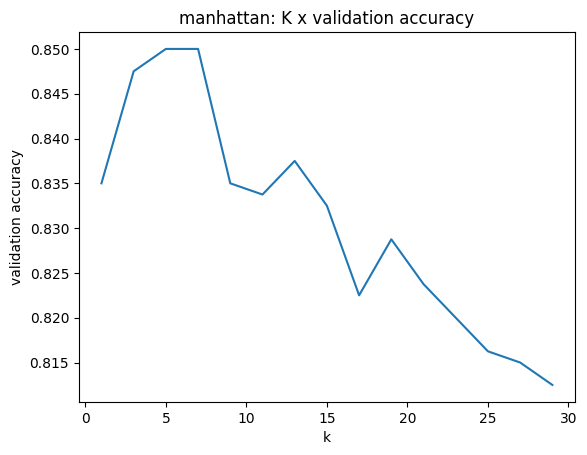

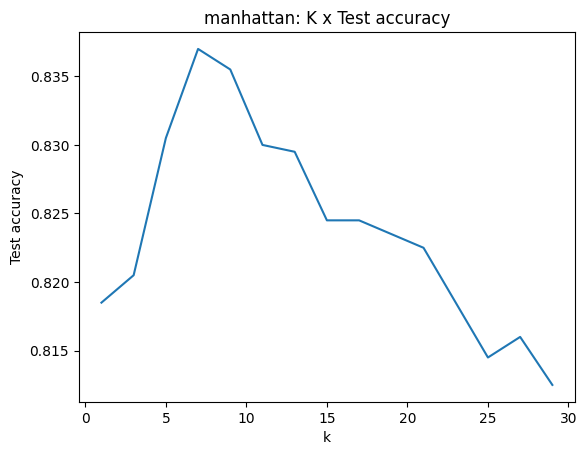

In [57]:
# Cria o classificador KNN
KVals = range(1,30,2)
accuracies = []
val_accuracies = []
test_accuracies = []
for k in KVals:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train_scaled, y_train)
    #avaliacao
    score = knn.score(X_test_scaled, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    # Avaliar o modelo no conjunto de Validação
    y_val_pred = knn.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)
    print('Acurácia no conjunto de validação:', val_accuracy)
    # Avalia o modelo no conjunto de teste
    y_test_pred = knn.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    print('Acurácia no conjunto de teste:', test_accuracy)

plt.title('manhattan: K x validation accuracy')
plt.plot(KVals, val_accuracies)
plt.xlabel("k")
plt.ylabel('validation accuracy')
plt.show()
plt.title('manhattan: K x Test accuracy')
plt.plot(KVals, test_accuracies)
plt.xlabel("k")
plt.ylabel('Test accuracy')
plt.show()

Conclusão, k=5 é o melhor para os dois casos.